In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/home/brandon.nelson/Dev/PediatricCTSizeAugmentation/results/02-26-2024_19-52_redcnn_remove_random_noise_level/lcd_v_diameter_results.csv')
df

,observer,recon,diameter,insert_HU,dose_level,snr,auc,reader
0,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.316861,0.5941,1
1,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.398366,0.6200,2
2,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.410293,0.6248,3
3,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.277036,0.5983,4
4,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.442313,0.6411,5
...,...,...,...,...,...,...,...,...
62715,NPW 2D,fbp,350,3,100,1.455877,0.8480,6
62716,NPW 2D,fbp,350,3,100,1.252556,0.8214,7
62717,NPW 2D,fbp,350,3,100,1.214887,0.8060,8
62718,NPW 2D,fbp,350,3,100,1.260605,0.8189,9


In [28]:
def calculate_task_improvement(results, measure='auc'):
    means = df.groupby(['diameter', 'recon', 'insert_HU', 'dose_level', 'observer'])['auc'].mean()
    noise_reductions = []
    for idx, row in results.iterrows():
        fbp_noise = means[row['diameter'], ' fbp              ',row['insert_HU'], row['dose_level'], row['observer']]
        noise_reductions.append(row[measure] - fbp_noise)
    results[f'delta {measure}'] = noise_reductions
    return results

In [30]:
df['delta auc'] = calculate_task_improvement(df)['delta auc']
df

,observer,recon,diameter,insert_HU,dose_level,snr,auc,reader,delta auc
0,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.316861,0.5941,1,-0.030153
1,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.398366,0.6200,2,-0.004252
2,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.410293,0.6248,3,0.000548
3,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.277036,0.5983,4,-0.025952
4,Laguerre-Gauss CHO 2D,RED-CNN,112,14,10,0.442313,0.6411,5,0.016848
...,...,...,...,...,...,...,...,...,...
62715,NPW 2D,fbp,350,3,100,1.455877,0.8480,6,0.023400
62716,NPW 2D,fbp,350,3,100,1.252556,0.8214,7,-0.003200
62717,NPW 2D,fbp,350,3,100,1.214887,0.8060,8,-0.018600
62718,NPW 2D,fbp,350,3,100,1.260605,0.8189,9,-0.005700


## LG CHO

<Axes: xlabel='diameter', ylabel='auc'>

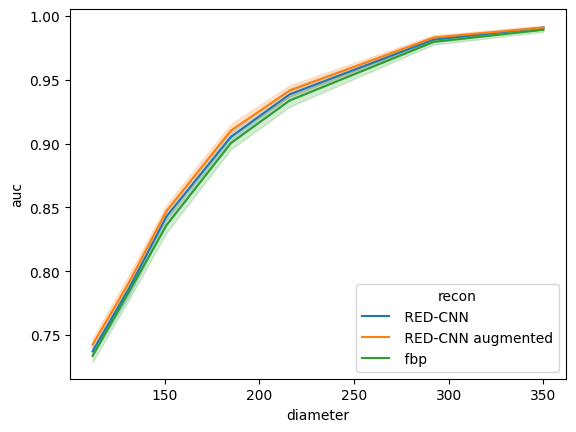

In [56]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200)], x='diameter', y='auc', hue='recon')

<Axes: xlabel='diameter', ylabel='auc'>

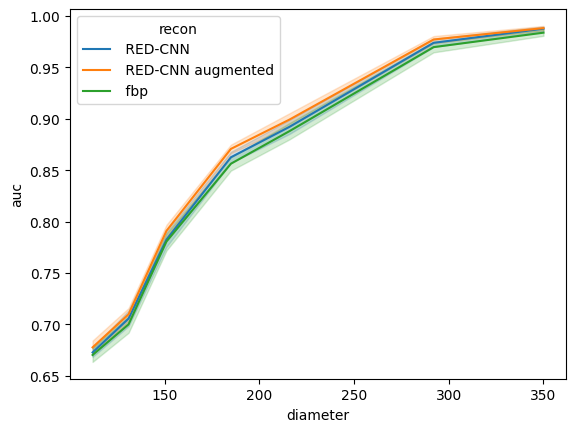

In [57]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200) &
                     (df['dose_level']==25)], x='diameter', y='auc', hue='recon')

<Axes: xlabel='diameter', ylabel='delta auc'>

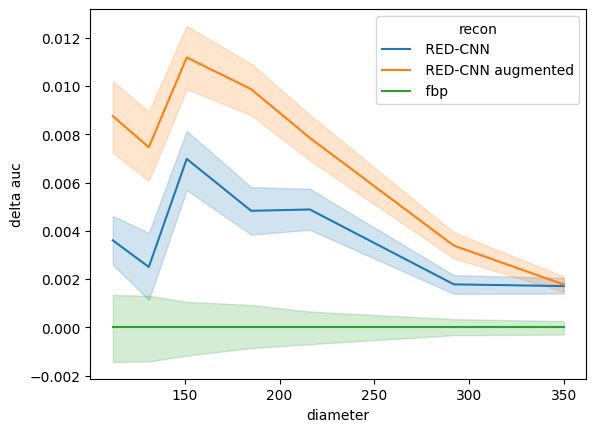

In [58]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='recon')

<Axes: xlabel='diameter', ylabel='delta auc'>

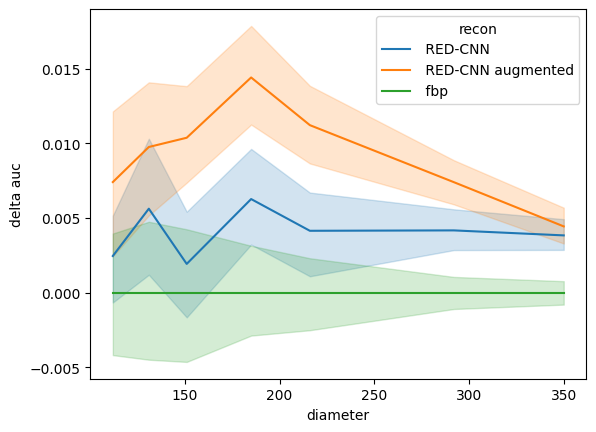

In [39]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200) &
                     (df['dose_level']==25)], x='diameter', y='delta auc', hue='recon')

<Axes: xlabel='diameter', ylabel='delta auc'>

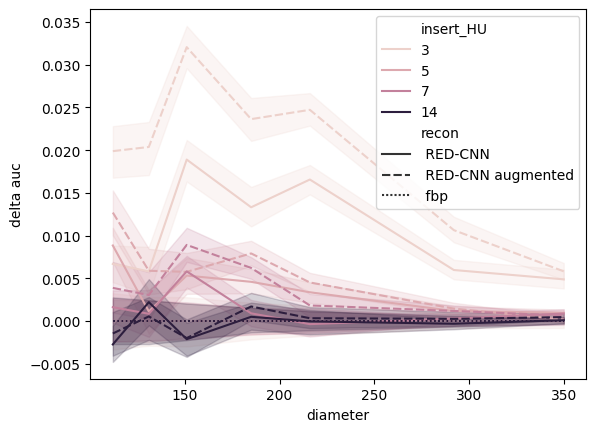

In [60]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', style='recon', hue='insert_HU')

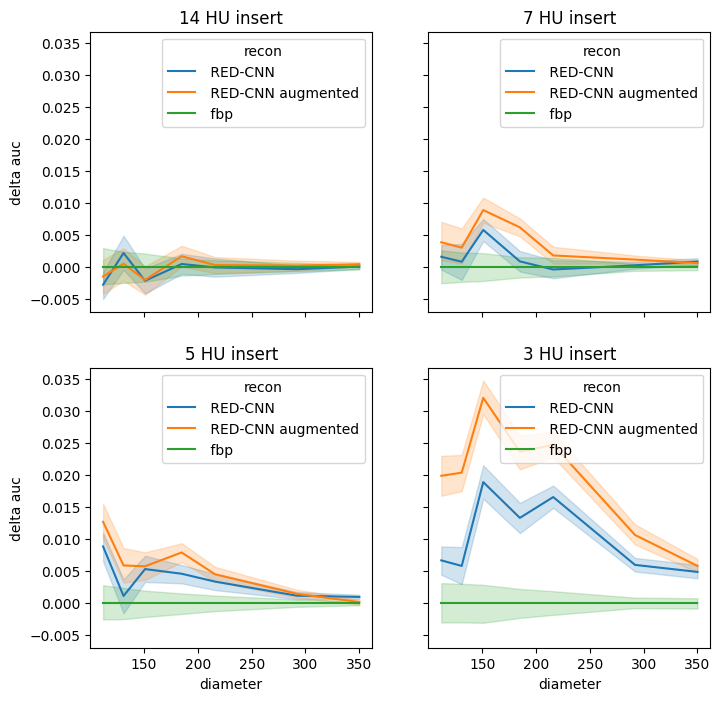

In [64]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                         (df['diameter']!=200) &
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

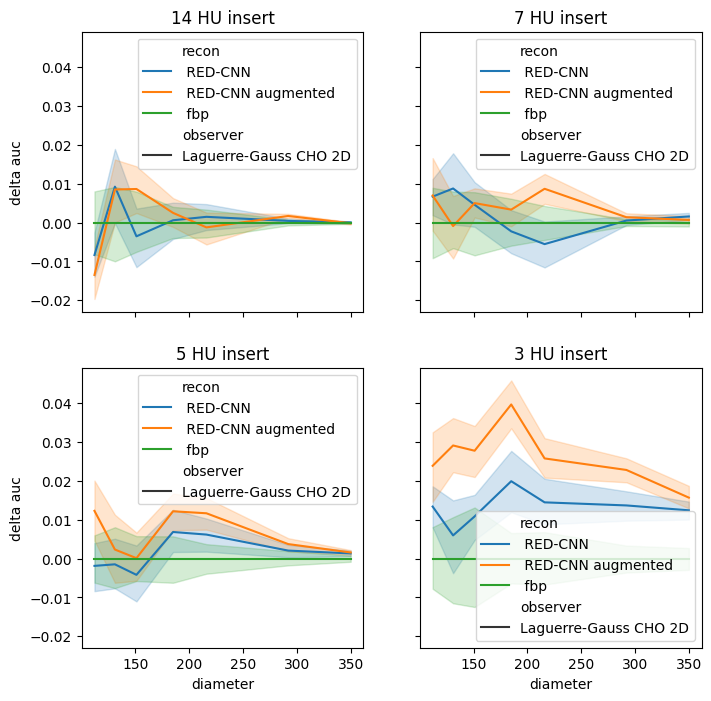

In [69]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                         (df['diameter']!=200) &
                         (df['dose_level']==25)&       
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                         (df['diameter']!=200) &
                         (df['dose_level']==25)&       
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

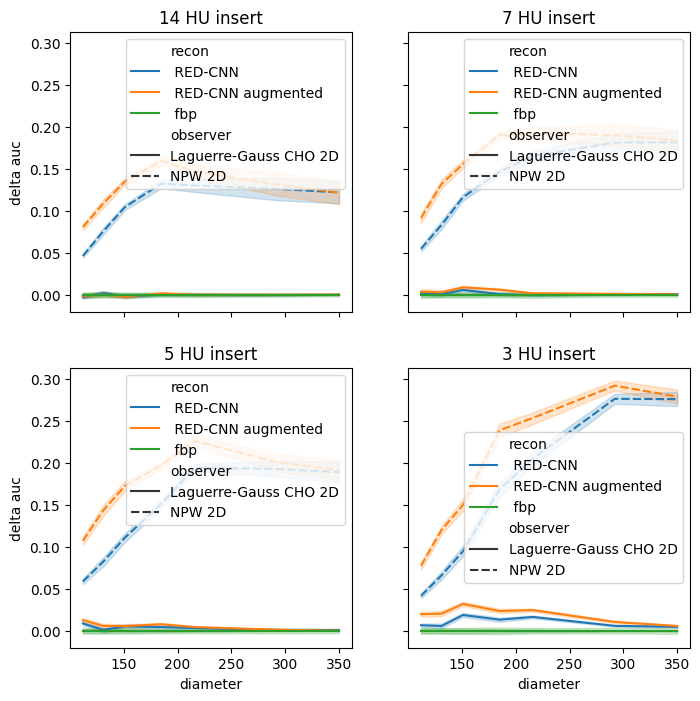

In [65]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

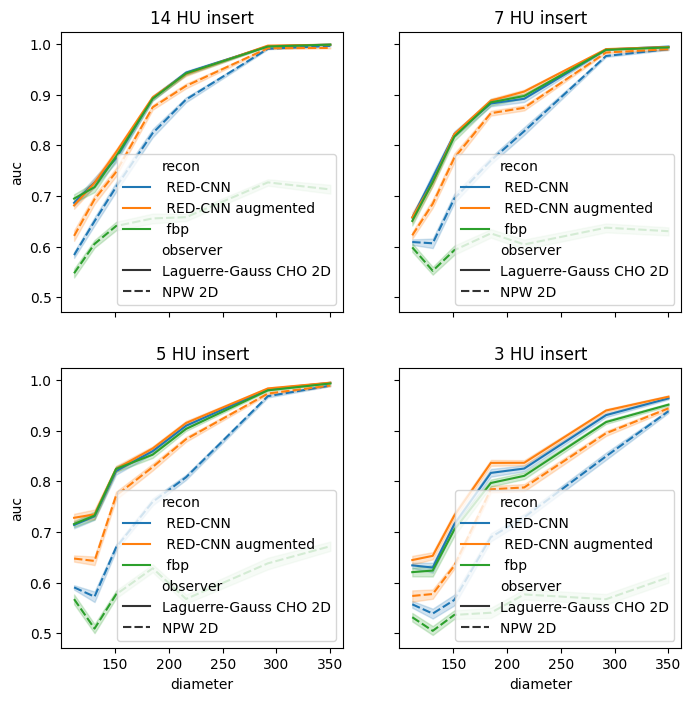

In [67]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu) &
                         (df['dose_level']==25) ], x='diameter', y='auc', hue='recon', style='observer')

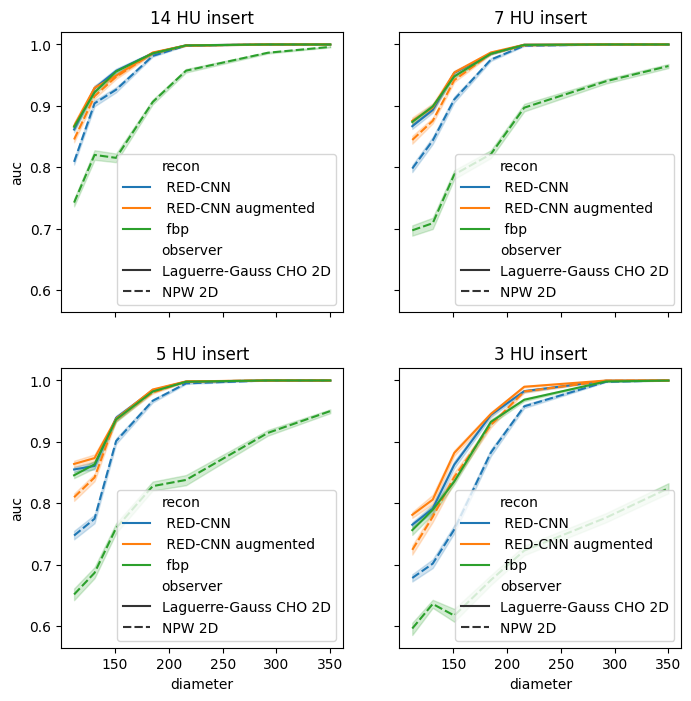

In [68]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu) &
                         (df['dose_level']==100) ], x='diameter', y='auc', hue='recon', style='observer')

<Axes: xlabel='diameter', ylabel='delta auc'>

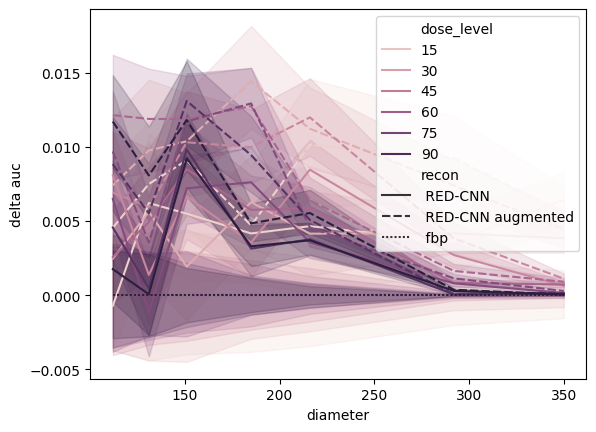

In [41]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='dose_level', style='recon')

## NPW

<Axes: xlabel='diameter', ylabel='auc'>

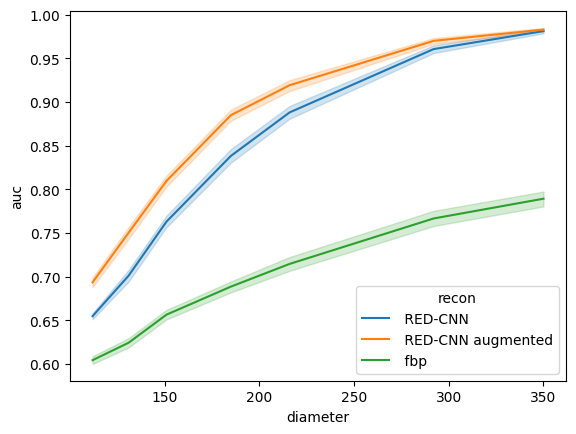

In [54]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='auc', hue='recon')

<Axes: xlabel='diameter', ylabel='auc'>

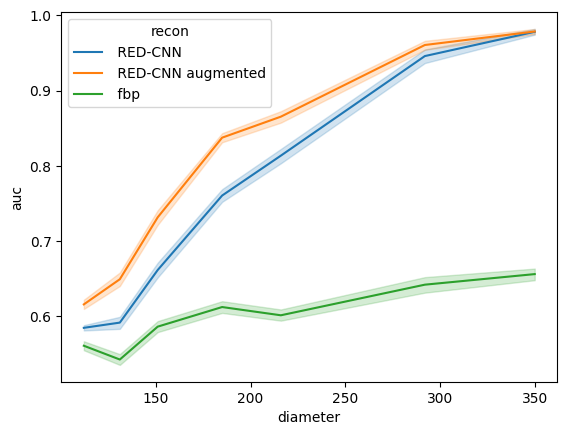

In [55]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200) &
                     (df['dose_level'] == 25)], x='diameter', y='auc', hue='recon')

<Axes: xlabel='diameter', ylabel='delta auc'>

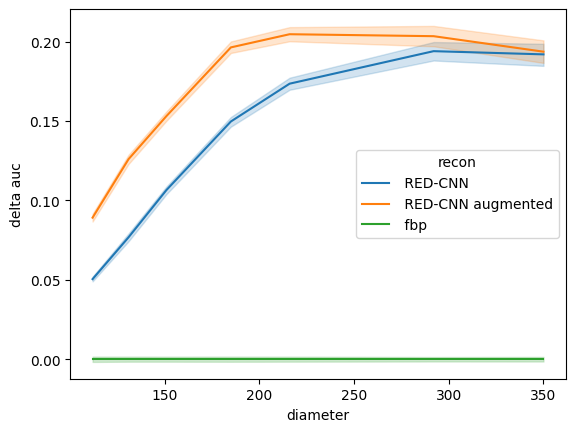

In [53]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='recon')

<Axes: xlabel='diameter', ylabel='delta auc'>

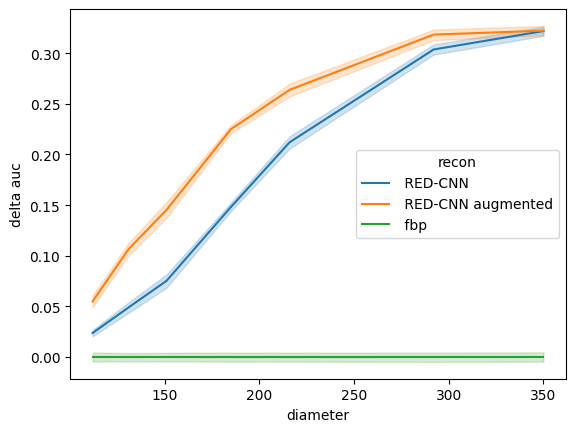

In [52]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200) &
                     (df['dose_level'] == 25)], x='diameter', y='delta auc', hue='recon')

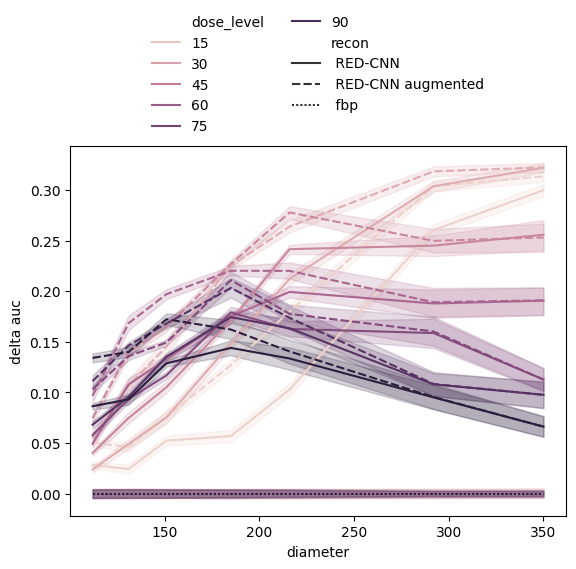

In [47]:
f = sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='dose_level', style='recon')
sns.move_legend(
    f, "lower center",
    bbox_to_anchor=(0.5, 1), ncol=2, frameon=False
)